In [38]:
import numpy as np
import matplotlib.pyplot as plt

def iterate(y_prev, h):
    y1 = y_prev[0]
    y2 = y_prev[1]
    
    y1_new = y1 + h * (-0.04 * y1 + 1e4 * y2 * (1 - y1 - y2))
    y2_new = y2 + h * (0.04 * y1 - 1e4 * y2 * (1 - y1 - y2) - 3e7 * y2**2)
    
    return y1_new, y2_new
    

h = 1e-06


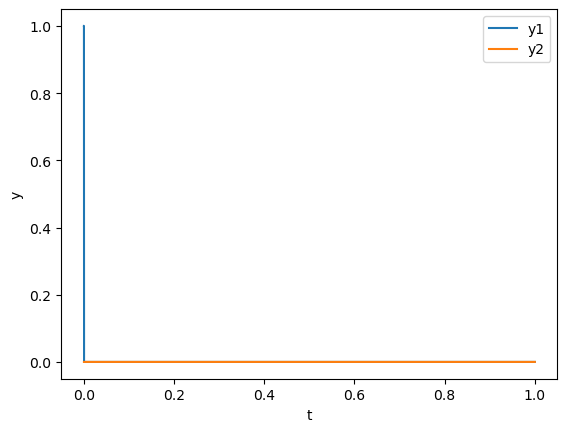

In [39]:
y1 = 1
y2 = 0

T = 1

ts = np.linspace(0, T, int(1000000))
y1s = np.zeros_like(ts)
y2s = np.zeros_like(ts)

y1s[0] = y1
y2s[0] = y2

h = T / len(ts)
print(f"h = {h}")
for i in range(1, 5):
    y1, y2 = iterate((y1, y2), h)
    y1s[i] = y1
    y2s[i] = y2
    
plt.plot(ts, y1s, label='y1')
plt.plot(ts, y2s, label='y2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()


In [40]:
print(f"y1 = {y1s[:50]}")
print(f"y2 = {y2s[:50]}")

print(f"y1 = {y1s[-10:]}")
print(f"y2 = {y2s[-10:]}")

y1 = [1.         0.99999996 0.99999992 0.99999988 0.99999984 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
y2 = [0.00000000e+00 4.00000000e-08 7.99999504e-08 1.19999755e-07
 1.59999318e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.000

Equation for ( y_1 ):

$\frac{dy_1}{dt} = -0.04 , y_1 + 10^4 , y_2 , (1 - y_1 - y_2)$

Equation for ( y_2 ):

$\frac{dy_2}{dt} = 0.04 , y_1 - 10^4 , y_2 , (1 - y_1 - y_2) - 3 \times 10^7 , y_2^2$

This system models a chemical kinetics problem with reactions occurring at vastly different rates, which leads to stiffness in the equations.

Euler's Method and Linearization
Explicit Euler's Method for a system of ODEs updates the solution from ( t_n ) to ( t_{n+1} = t_n + h ) using:

$\mathbf{y}_{n+1} = \mathbf{y}_n + h , \mathbf{f}(\mathbf{y}_n)$

where ( \mathbf{f}(\mathbf{y}_n) ) is the RHS evaluated at ( \mathbf{y}_n ).

Linearizing the RHS at each solution point involves approximating ( $\mathbf{f}(\mathbf{y})$ ) near ( $\mathbf{y}_n$ ) by its first-order Taylor expansion:

$\mathbf{f}(\mathbf{y}) \approx \mathbf{f}(\mathbf{y}_n) + \mathbf{J}(\mathbf{y}_n) (\mathbf{y} - \mathbf{y}_n)$

where ( \mathbf{J}(\mathbf{y}_n) ) is the Jacobian matrix of partial derivatives evaluated at ( \mathbf{y}_n ):

$\mathbf{J}(\mathbf{y}n) = \left \frac{\partial f_i}{\partial y_j} \right{\mathbf{y}_n}$

Calculating the Jacobian
Let's compute the Jacobian matrix ( \mathbf{J} ) at a given point ( (y_1, y_2) ):

Partial derivatives for ( f_1(y_1, y_2) ):

$\begin{align*} \frac{\partial f_1}{\partial y_1} &= -0.04 - 10^4 , y_2 \ \frac{\partial f_1}{\partial y_2} &= 10^4 , (1 - y_1 - y_2) - 10^4 , y_2 (-1) \ &= 10^4 , (1 - y_1 - y_2 + y_2) \ &= 10^4 , (1 - y_1) \end{align*}$

Partial derivatives for ( f_2(y_1, y_2) ):

$\begin{align*} \frac{\partial f_2}{\partial y_1} &= 0.04 + 10^4 , y_2 \ \frac{\partial f_2}{\partial y_2} &= -10^4 , (1 - y_1 - y_2) + 10^4 , y_2 (-1) - 6 \times 10^7 , y_2 \ &= -10^4 , (1 - y_1 - y_2) - 10^4 , y_2 - 6 \times 10^7 , y_2 \ &= -10^4 , (1 - y_1 - y_2 + y_2) - 6 \times 10^7 , y_2 \ &= -10^4 , (1 - y_1) - 6 \times 10^7 , y_2 \end{align*}$

Jacobian Matrix ( \mathbf{J} ):

$\mathbf{J} = \begin{bmatrix} \frac{\partial f_1}{\partial y_1} & \frac{\partial f_1}{\partial y_2} \ \frac{\partial f_2}{\partial y_1} & \frac{\partial f_2}{\partial y_2} \end{bmatrix} = \begin{bmatrix} -0.04 - 10^4 y_2 & 10^4 (1 - y_1) \ 0.04 + 10^4 y_2 & -10^4 (1 - y_1) - 6 \times 10^7 y_2 \end{bmatrix}$

Stability Analysis
The stability of the explicit Euler method depends on the eigenvalues of the Jacobian matrix. For the method to be stable, the time step ( h ) must satisfy certain conditions related to these eigenvalues.

Eigenvalues ( \lambda ) of ( \mathbf{J} ) play a crucial role:

Stability Condition: For explicit Euler,

$|1 + h \lambda| \leq 1$

for all eigenvalues ( \lambda ) of ( \mathbf{J} ). However, this condition is overly restrictive for stiff equations.

Stiffness: When the system has eigenvalues with large negative real parts, it is considered stiff. The presence of rapidly decaying modes requires very small ( h ) to maintain stability with explicit methods.

Why a Very Small Time Step is Needed
Large Eigenvalues Due to Reaction Rates:

The coefficients ( 10^4 ) and ( 3 \times 10^7 ) indicate very fast reaction rates.
These large values lead to large entries in the Jacobian matrix.
Magnitude of Eigenvalues:

The eigenvalues of ( \mathbf{J} ) can be approximated to have large negative real parts.
Let's consider typical values of ( y_1 ) and ( y_2 ) (between 0 and 1). Even then, the Jacobian entries are dominated by the large coefficients.
Stability Constraint on Time Step ( h ):

For stability, the time step ( h ) must satisfy:

$h < \frac{2}{|\lambda_{\text{max}}|}$

where ( \lambda_{\text{max}} ) is the eigenvalue with the largest magnitude (most negative).

Given that ( |\lambda_{\text{max}}| ) could be on the order of ( 10^7 ) or higher, ( h ) must be very small:

$h < \frac{2}{10^7} = 2 \times 10^{-7}$

Implications for Euler's Method:

Using such a small ( h ) results in a need for an impractically large number of time steps to simulate over a reasonable time span.
The explicit Euler method becomes inefficient and computationally expensive for stiff systems.
Conclusion
By linearizing the RHS at each solution point, we observe that:

The system is stiff due to the large coefficients leading to rapidly changing solutions in certain components.

Explicit Euler's method requires a very small time step to maintain numerical stability, which arises from the need to satisfy the stability condition related to the eigenvalues of the Jacobian.

Efficiency Concerns:

A very small ( h ) leads to a significant computational burden.
Explicit methods are not suitable for stiff systems in practice.
Alternative Approaches
To efficiently solve stiff systems like this one, consider the following:

Implicit Methods:

Implicit Euler Method:

$\mathbf{y}_{n+1} = \mathbf{y}n + h , \mathbf{f}(\mathbf{y}{n+1})$

Implicit methods are unconditionally stable for linear systems with certain properties and allow for larger time steps.

Semi-Implicit or Adaptive Methods:

Backward Differentiation Formulas (BDF): Suitable for stiff problems.

Adaptive Time Stepping: Adjust ( h ) dynamically based on the solution's behavior.

Stiff ODE Solvers:

Use specialized algorithms designed for stiff equations, such as those implemented in software libraries (e.g., ode15s in MATLAB, scipy.integrate.solve_ivp with method 'BDF' in Python).
Summary
The need for a very small time step when using explicit Euler's method on this system arises from:

Linearization revealing large eigenvalues in the Jacobian matrix due to high reaction rates.

Stability constraints requiring ( h ) to be inversely proportional to the largest eigenvalue magnitude.

Inefficiency of explicit methods for stiff systems.

Understanding this highlights the importance of choosing appropriate numerical methods tailored to the problem's characteristics.